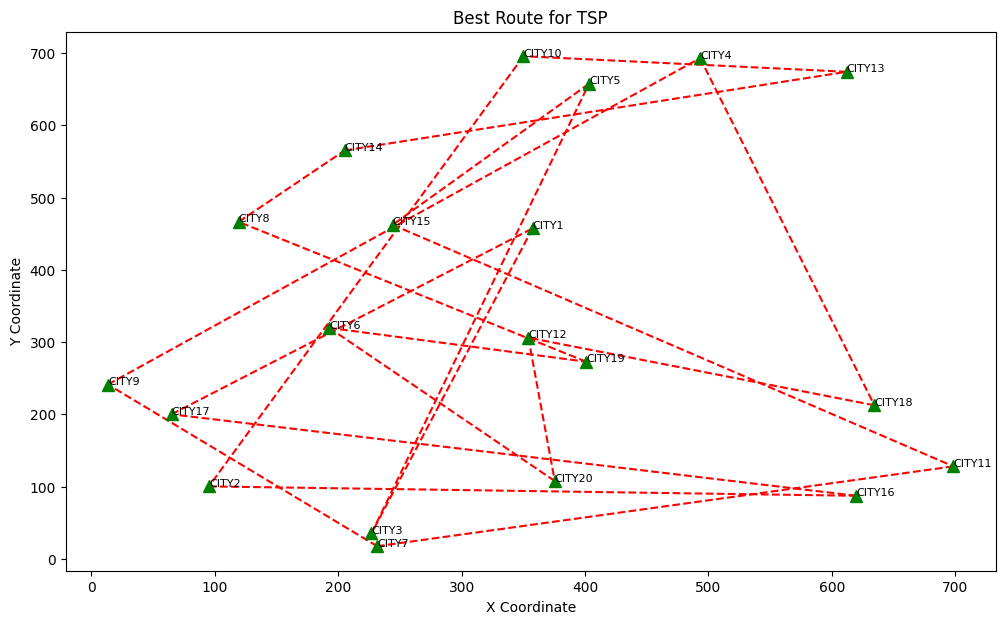

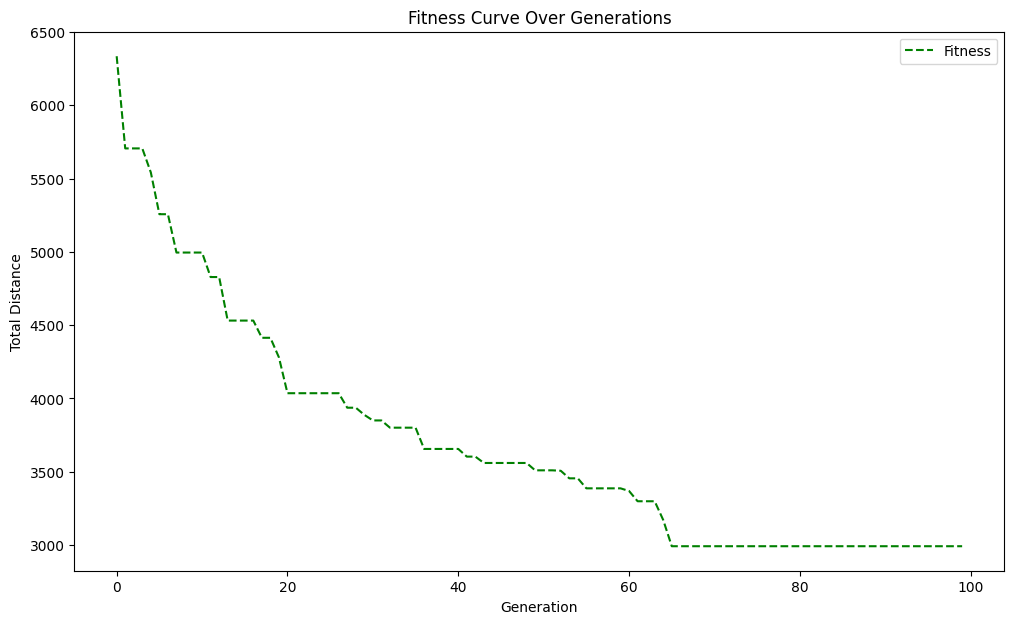

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

class City:
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y

    def distance_to(self, city):
        return np.hypot(self.x - city.x, self.y - city.y)

    def __repr__(self):
        return f"{self.name}"

class CityPosition:
    def __init__(self, num_cities):
        self.cities = [City(f"CITY{i+1}", random.uniform(0, 700), random.uniform(0, 700)) for i in range(num_cities)]

    def generate_initial_population(self, pop_size):
        population = []
        for _ in range(pop_size):
            route = self.cities[:]
            random.shuffle(route)
            population.append(route)
        return population

class GeneticAlgorithm:
    def __init__(self, mutation_rate, pop_size, num_cities, max_generations):
        self.mutation_rate = mutation_rate
        self.pop_size = pop_size
        self.num_cities = num_cities
        self.max_generations = max_generations
        self.city_position = CityPosition(num_cities)
        self.fitness_curve = []

    def calculate_fitness(self, route):
        return sum([route[i].distance_to(route[(i + 1) % len(route)]) for i in range(len(route))])

    def mutate(self, route):
        for swapped in range(len(route)):
            if random.random() < self.mutation_rate:
                swap_with = int(random.random() * len(route))

                # Swap them
                route[swapped], route[swap_with] = route[swap_with], route[swapped]
        return route

    def evolve(self, population):
        sorted_population = sorted(population, key=self.calculate_fitness)
        cutoff = int(len(sorted_population) * 0.50)
        reduced_pop = sorted_population[:cutoff]
        new_pop = reduced_pop[:]
        while len(new_pop) < len(population):
            candidates = random.sample(reduced_pop, 2)
            child_route = self.crossover(candidates[0], candidates[1])
            new_pop.append(self.mutate(child_route))
        return new_pop

    def crossover(self, parent1, parent2):
        start, end = sorted([random.randint(0, self.num_cities - 1) for _ in range(2)])
        child = [None]*self.num_cities
        child[start:end] = parent1[start:end]
        child = [city for city in child if city is not None]
        child += [city for city in parent2 if city not in child]
        return child

    def run(self):
        population = self.city_position.generate_initial_population(self.pop_size)
        for generation in range(self.max_generations):
            population = self.evolve(population)
            current_best = sorted(population, key=self.calculate_fitness)[0]
            current_fitness = self.calculate_fitness(current_best)
            self.fitness_curve.append(current_fitness)

class TSP:
    def __init__(self, mutation_rate=0.01, pop_size=100, num_cities=50, max_generations=100):
        self.genetic_algorithm = GeneticAlgorithm(mutation_rate, pop_size, num_cities, max_generations)

    def plot_route(self, route):
        plt.figure(figsize=(12, 7))
        plt.title("Best Route for TSP")
        for index in range(1, len(route)):
            plt.plot([route[index - 1].x, route[index].x],
                     [route[index - 1].y, route[index].y], 'r--')  # Change line style to dashed red
            plt.text(route[index - 1].x, route[index - 1].y, route[index - 1].name, fontsize=8)
        plt.plot([route[-1].x, route[0].x],
                 [route[-1].y, route[0].y], 'r--')  # Change line style to dashed red
        plt.text(route[-1].x, route[-1].y, route[-1].name, fontsize=8)

        for city in route:
            plt.plot(city.x, city.y, 'g^', markersize=8, markerfacecolor='g')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()

    def plot_fitness_curve(self):
        plt.figure(figsize=(12, 7))
        plt.title("Fitness Curve Over Generations")
        plt.plot(self.genetic_algorithm.fitness_curve, 'g--', label='Fitness')  # Change color to green and line style to dashed
        plt.ylabel('Total Distance')
        plt.xlabel('Generation')
        plt.legend()
        plt.show()

    def run(self):
        self.genetic_algorithm.run()
        best_route = sorted(self.genetic_algorithm.city_position.generate_initial_population(1), key=self.genetic_algorithm.calculate_fitness)[0]
        self.plot_route(best_route)
        self.plot_fitness_curve()

if __name__ == "__main__":
    tsp = TSP(mutation_rate=0.01, pop_size=100, num_cities=20, max_generations=100)
    tsp.run()
